In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from os.path import basename, splitext

BASE_DIR = os.getcwd() 
sys.path.append(BASE_DIR)
sys.path.append(os.path.join(BASE_DIR, 'utils'))

import dataset
import data_visualization

In [2]:
#get all training data and shape names
data, label = dataset.getAllTrainingData()
shape_names = dataset.getShapeNames()

#file_list = dataset.get3DList()
#filename = basename(splitext(file_list[483])[0])
#mesh = "data/ModelNet40/guitar/train/guitar_0035.off"
#data_visualization.draw_mesh(mesh)

In [5]:
#print all the class and corresponding index
for i,v in enumerate(shape_names):
    print(i,v)

0 airplane
1 bathtub
2 bed
3 bench
4 bookshelf
5 bottle
6 bowl
7 car
8 chair
9 cone
10 cup
11 curtain
12 desk
13 door
14 dresser
15 flower_pot
16 glass_box
17 guitar
18 keyboard
19 lamp
20 laptop
21 mantel
22 monitor
23 night_stand
24 person
25 piano
26 plant
27 radio
28 range_hood
29 sink
30 sofa
31 stairs
32 stool
33 table
34 tent
35 toilet
36 tv_stand
37 vase
38 wardrobe
39 xbox


In [3]:
# plot one image for each class 
def plot_all(cls=-1):
    '''
    plot the first image of all classes
    '''
    if cls==1:
        for i in range(40):
            index, _ = np.where(label==i)
            images = data[index]
            print("Shape: %s , index: %d \n"%(shape_names[i], i))
            data_visualization.pyplot_draw_point_cloud(images[0],"")
    else:
        index, _ = np.where(label==cls)
        images = data[index]
        for i in range(7):
            data_visualization.pyplot_draw_point_cloud(images[i],"")
def plot_one(idx):
    '''
    plot the first image of the given class
    '''
    index, _ = np.where(label==idx)
    images = data[index]
    print("Shape: %s \n" %(shape_names[idx]))
    data_visualization.pyplot_draw_point_cloud(images[0],"")


In [4]:
def plot_mean_img(data, idx):
    '''
    plot the mean image of the given class
    '''
    index, _ = np.where(label==idx)
    images = data[index]
    mean_images = np.mean(images, axis=0)

    data_visualization.pyplot_draw_point_cloud(images[1],"")

    print(np.mean(images[1], axis=0))
  
    data_visualization.pyplot_draw_point_cloud(mean_images,"")

# Cone

<IPython.core.display.Javascript object>


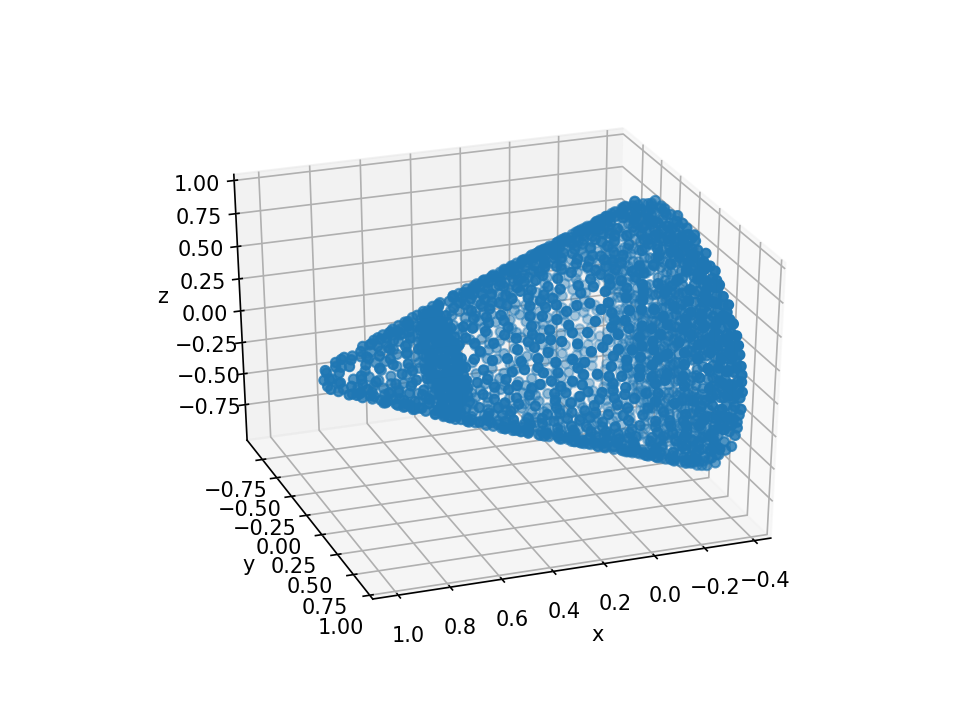

[  9.76433512e-09   8.04138836e-08  -6.58110366e-09]


<IPython.core.display.Javascript object>


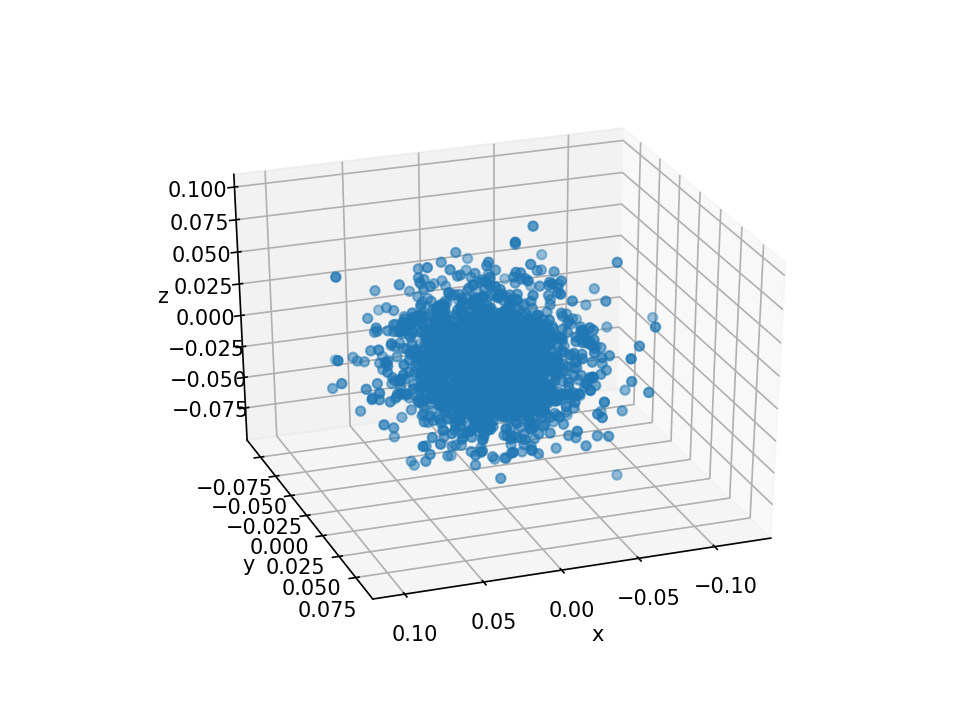

In [6]:
# index = 9
plot_mean_img(data,9)

# Airplane

<IPython.core.display.Javascript object>


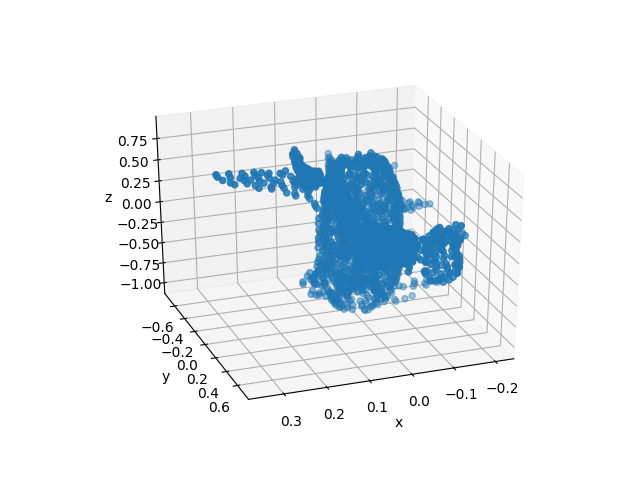

[ -1.29948603e-08   7.61610863e-08   2.35268089e-08]


<IPython.core.display.Javascript object>


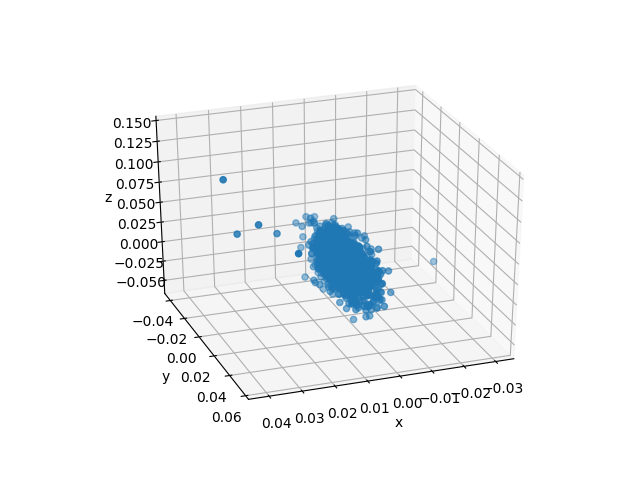

In [145]:
# index = 0
plot_mean_img(data,0)


cone


/home/yi/.virtualenvs/pointnet/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


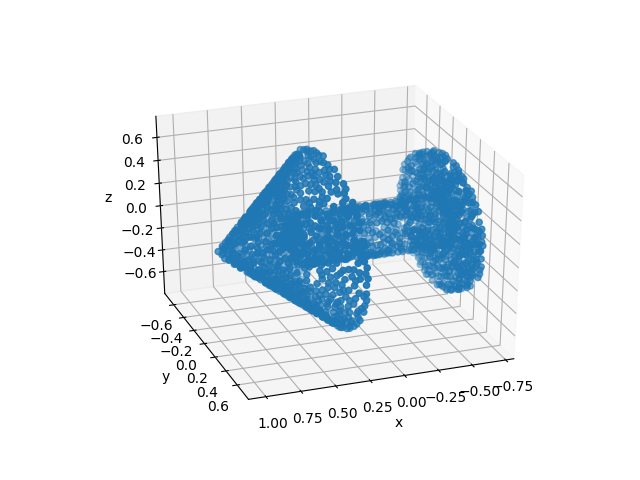

In [20]:
index, _ = np.where(label==9)
images = data[index]
shape = shape_names[label[index][7][0]]
print(shape)
data_visualization.pyplot_draw_point_cloud(images[7],"")

# Chair

/home/yi/.virtualenvs/pointnet/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


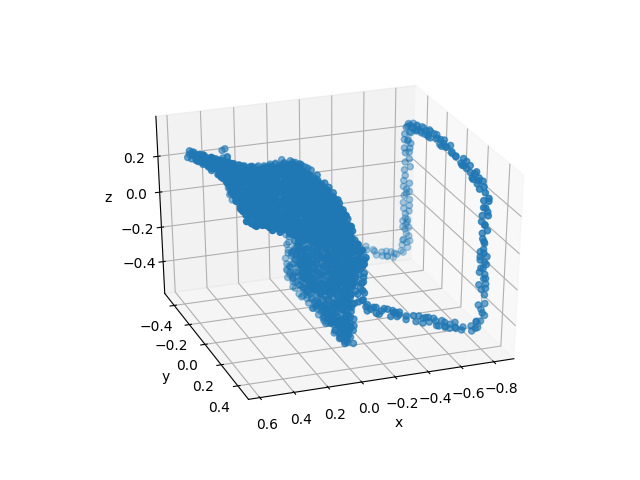

<IPython.core.display.Javascript object>


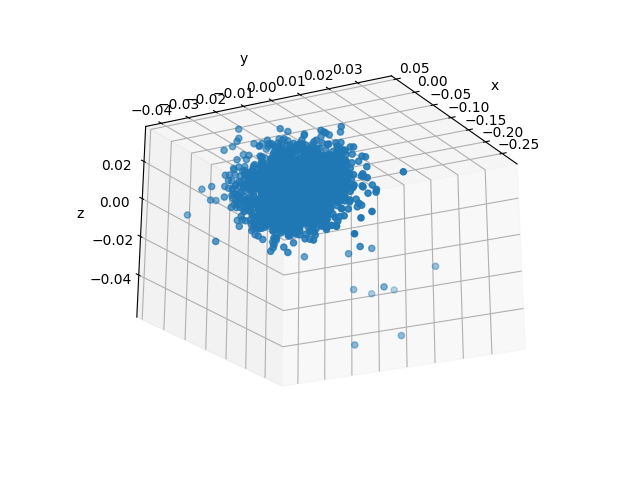

In [21]:
plot_mean_img(data,8)


# Table

/home/yi/.virtualenvs/pointnet/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


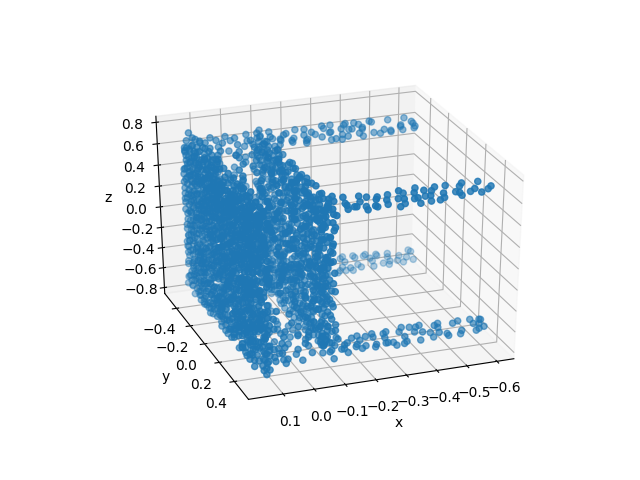

<IPython.core.display.Javascript object>


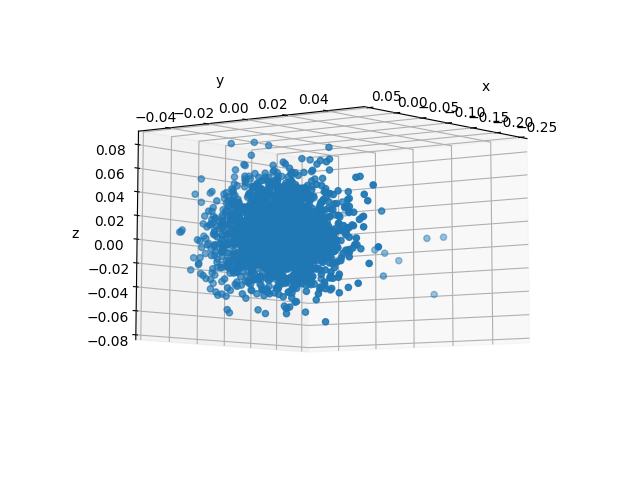

In [23]:
plot_mean_img(data,33)


# Door

<IPython.core.display.Javascript object>


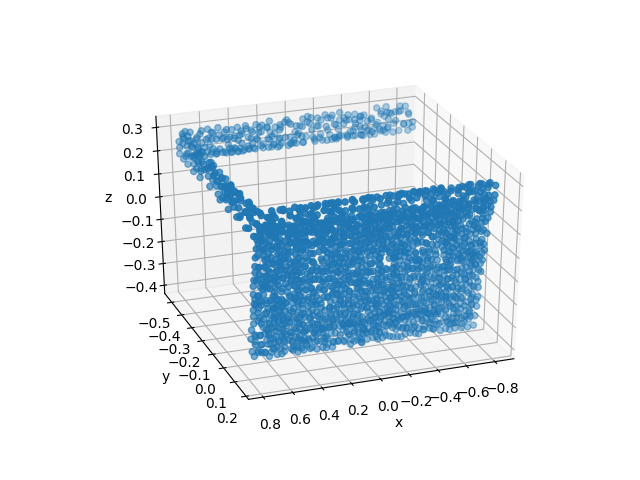

[  3.28072929e-07   1.48720574e-08  -8.40009307e-09]


<IPython.core.display.Javascript object>


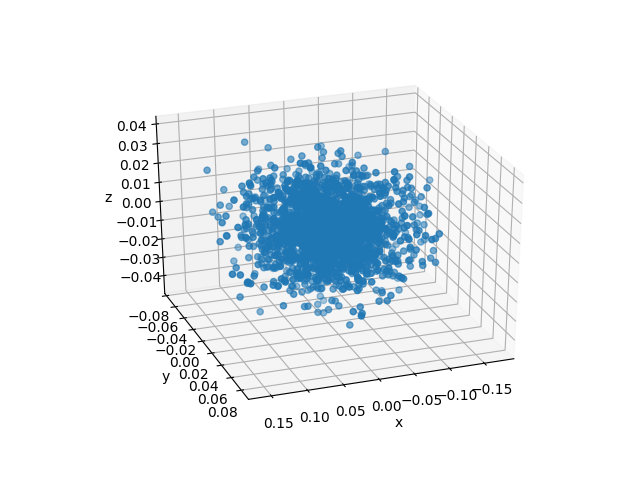

In [146]:
plot_mean_img(data,13)


In [7]:
import tensorflow as tf
import numpy as np
import argparse
import socket
import importlib
import scipy.misc
BASE_DIR = os.getcwd() 
print(BASE_DIR)
sys.path.append(os.path.join(BASE_DIR, 'pointnet'))
sys.path.append(os.path.join(BASE_DIR, 'pointnet/models'))
sys.path.append(os.path.join(BASE_DIR, 'pointnet/utils'))
import provider
import pc_util

/home/yi/Documents/Research/PointNet3


In [8]:
BATCH_SIZE = 1
NUM_POINT = 1024
MODEL_PATH = "pointnet/log/model.ckpt"
MODEL = importlib.import_module('pointnet_cls', 'pointnet')

GPU_INDEX = 0
NUM_CLASSES = 40
SHAPE_NAMES = [line.rstrip() for line in \
    open(os.path.join(BASE_DIR, 'data/modelnet40_ply_hdf5_2048/shape_names.txt'))]
# ModelNet40 official train/test split
TRAIN_FILES = provider.getDataFiles( \
    os.path.join(BASE_DIR, 'data/modelnet40_ply_hdf5_2048/train_files.txt'))
TEST_FILES = provider.getDataFiles(\
    os.path.join(BASE_DIR, 'data/modelnet40_ply_hdf5_2048/test_files.txt'))


In [9]:
def evaluate(num_votes):
    is_training = False

    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())

        # simple model
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl)
        loss = MODEL.get_loss(pred, labels_pl, end_points)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = True
    sess = tf.Session(config=config)

    # Restore variables from disk.
    saver.restore(sess, MODEL_PATH)
    log_string("Model restored.")

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'end_points':end_points}
           #'point_transformed': point_transformed}

    eval_one_epoch(sess, ops, num_votes)

def eval_one_epoch(sess, ops, num_votes=1, topk=1):
    error_cnt = 0
    is_training = False
    total_correct = 0
    total_seen = 0
    loss_sum = 0
    total_seen_class = [0 for _ in range(NUM_CLASSES)]
    total_correct_class = [0 for _ in range(NUM_CLASSES)]
    for fn in range(len(TEST_FILES)):
        log_string('----'+str(fn)+'----')
        current_data, current_label = provider.loadDataFile(TEST_FILES[fn])
        current_data = current_data[:5,0:NUM_POINT,:]
        current_label = np.squeeze(current_label[:5])
        
        file_size = current_data.shape[0]
        
        num_batches = file_size // BATCH_SIZE
        print(file_size)
        print("batches:, NUM", num_batches, BATCH_SIZE)
        print(SHAPE_NAMES[current_label[0]], "  original")
        output_img = pc_util.pyplot_draw_point_cloud(current_data[0], "")
        p = 0
        for batch_idx in range(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE
            cur_batch_size = end_idx - start_idx

            # Aggregating BEG
            batch_loss_sum = 0 # sum of losses for the batch
            batch_pred_sum = np.zeros((cur_batch_size, NUM_CLASSES)) # score for classes
            batch_pred_classes = np.zeros((cur_batch_size, NUM_CLASSES)) # 0/1 for classes
            for vote_idx in range(num_votes):

                rotated_data = provider.rotate_point_cloud_by_angle(current_data[start_idx:end_idx, :, :],
                                                  vote_idx/float(num_votes) * np.pi * 2)
               
                feed_dict = {ops['pointclouds_pl']: rotated_data,
                             ops['labels_pl']: current_label[start_idx:end_idx],
                             ops['is_training_pl']: is_training}
                end_points, loss_val, pred_val = sess.run([ops['end_points'], ops['loss'], ops['pred']],
                                          feed_dict=feed_dict)
                #print(p_transformed.shape)
                if(p<2):
                    print(SHAPE_NAMES[current_label[0]], "  transformed")
                    pc_util.pyplot_draw_point_cloud(end_points['pc_transformed'][0], "")
                    p = p + 1
                batch_pred_sum += pred_val
                batch_pred_val = np.argmax(pred_val, 1)
                for el_idx in range(cur_batch_size):
                    batch_pred_classes[el_idx, batch_pred_val[el_idx]] += 1
                batch_loss_sum += (loss_val * cur_batch_size / float(num_votes))
            
            pred_val = np.argmax(batch_pred_sum, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += cur_batch_size
            loss_sum += batch_loss_sum

            for i in range(start_idx, end_idx):
                l = current_label[i]
                total_seen_class[l] += 1
                total_correct_class[l] += (pred_val[i-start_idx] == l)
                


    log_string('eval mean loss: %f' % (loss_sum / float(total_seen)))
    log_string('eval accuracy: %f' % (total_correct / float(total_seen)))
    log_string('eval avg class acc: %f' % (np.mean(np.array(total_correct_class)/np.array(total_seen_class,dtype=np.float))))

    class_accuracies = np.array(total_correct_class)/np.array(total_seen_class,dtype=np.float)
    for i, name in enumerate(SHAPE_NAMES):
        log_string('%10s:\t%0.3f' % (name, class_accuracies[i]))

INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
INFO:tensorflow:Restoring parameters from pointnet/log/model.ckpt
Model restored.
----0----
5
batches:, NUM 5 1
bookshelf   original


<IPython.core.display.Javascript object>


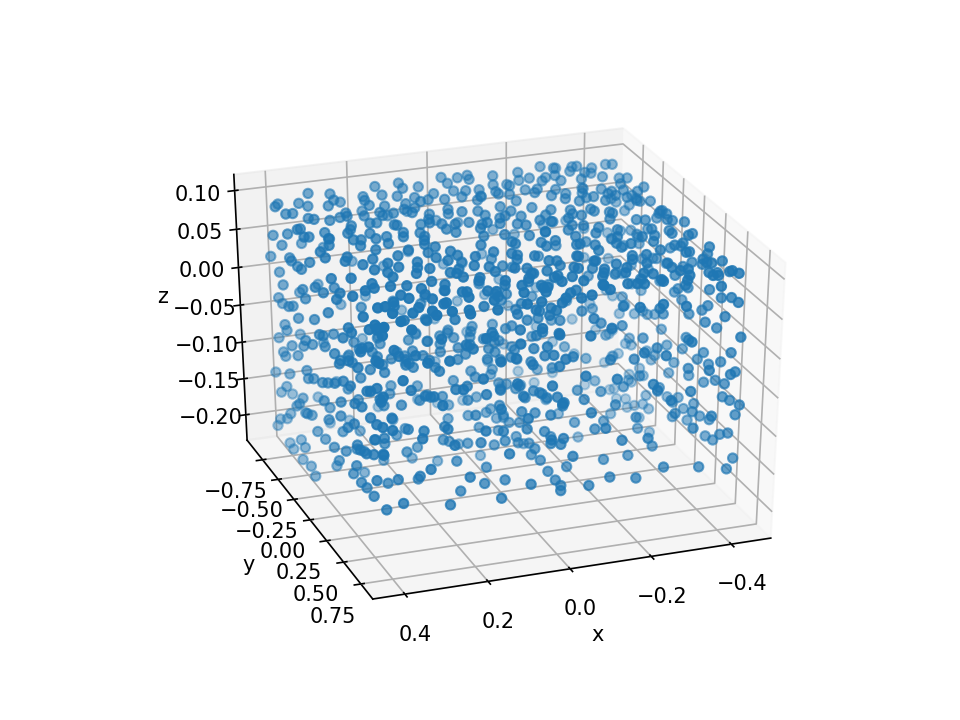

bookshelf   transformed


<IPython.core.display.Javascript object>


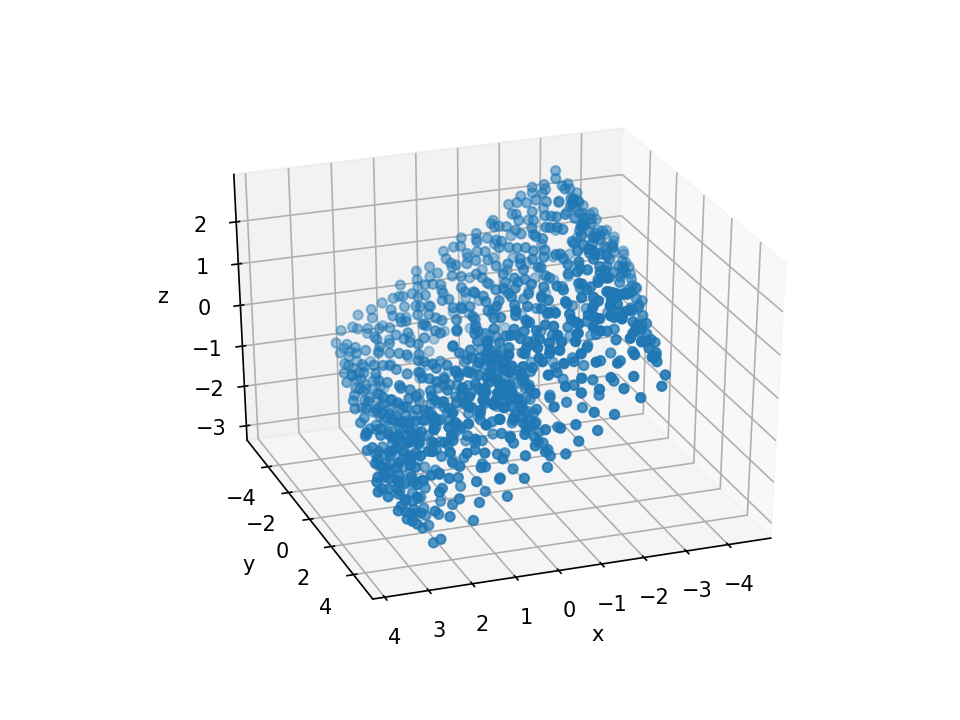

bookshelf   transformed


<IPython.core.display.Javascript object>


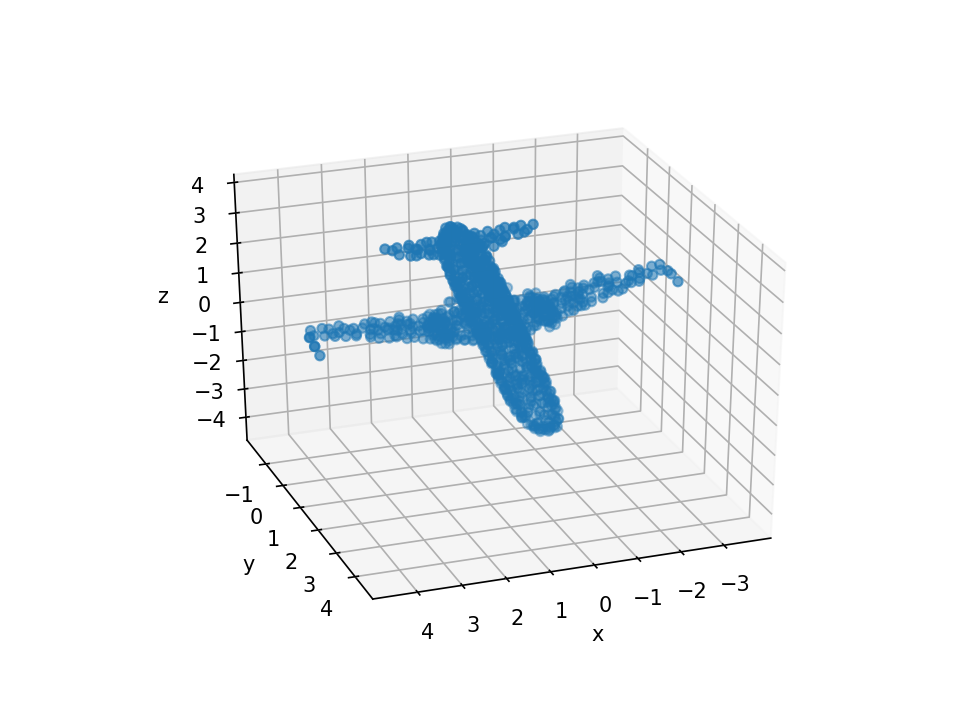

----1----
5
batches:, NUM 5 1
range_hood   original


<IPython.core.display.Javascript object>


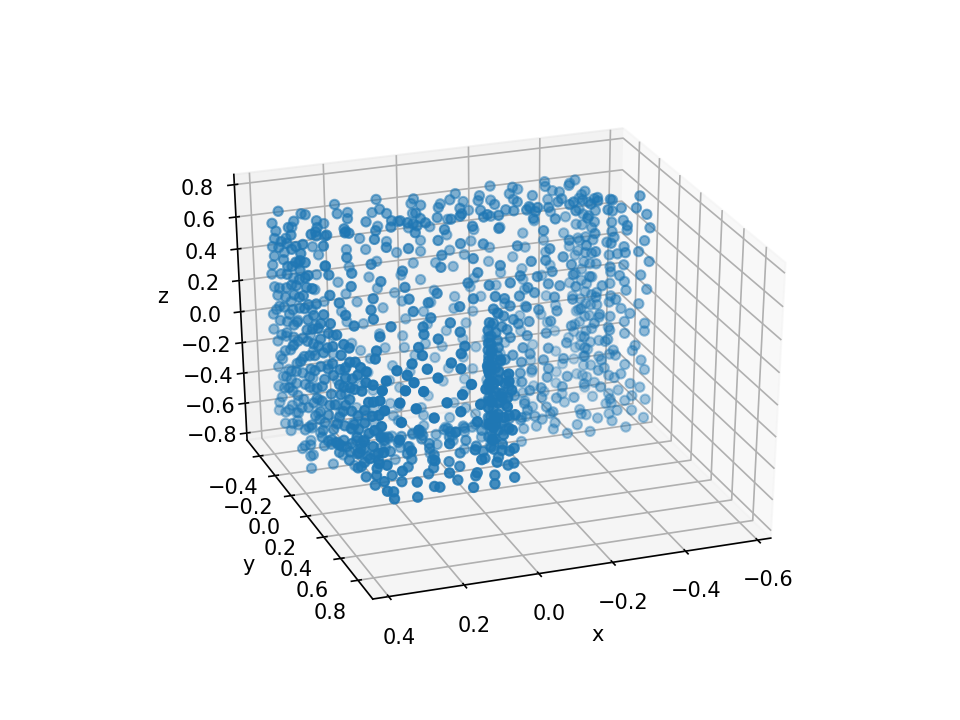

range_hood   transformed


<IPython.core.display.Javascript object>


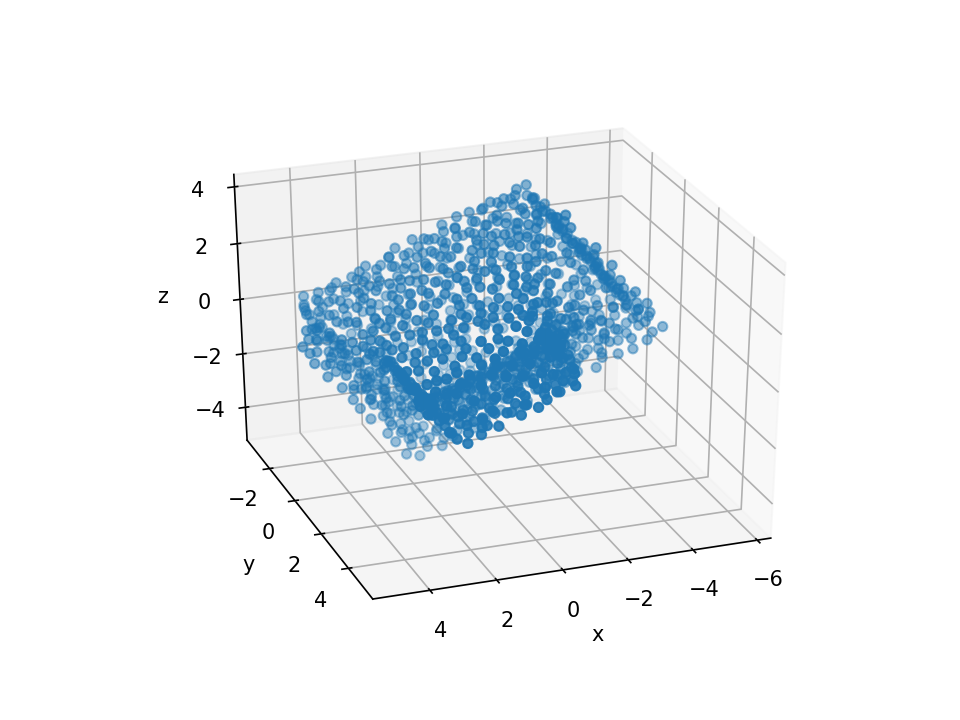

range_hood   transformed


<IPython.core.display.Javascript object>


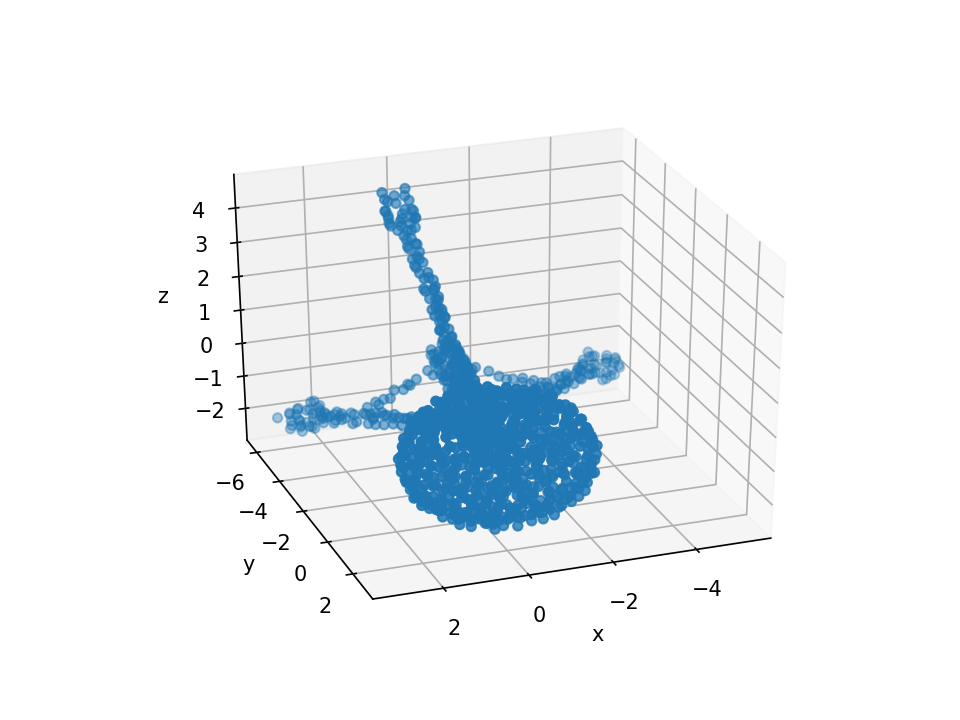

eval mean loss: 0.110462
eval accuracy: 0.900000
eval avg class acc: nan
  airplane:	1.000
   bathtub:	nan
       bed:	1.000
     bench:	nan
 bookshelf:	1.000
    bottle:	nan
      bowl:	nan
       car:	nan
     chair:	1.000
      cone:	nan
       cup:	nan
   curtain:	nan
      desk:	nan
      door:	nan
   dresser:	nan
flower_pot:	nan
 glass_box:	nan
    guitar:	nan
  keyboard:	nan
      lamp:	nan
    laptop:	nan
    mantel:	nan
   monitor:	nan
night_stand:	1.000
    person:	nan
     piano:	nan
     plant:	1.000
     radio:	nan
range_hood:	0.000
      sink:	nan
      sofa:	nan
    stairs:	nan
     stool:	1.000
     table:	nan
      tent:	nan
    toilet:	nan
  tv_stand:	1.000
      vase:	nan
  wardrobe:	nan
      xbox:	nan


/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide
/home/yi/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in true_divide


In [11]:
def log_string(out_str):
    print(out_str)
    
with tf.Graph().as_default():
        evaluate(num_votes=1)

In [12]:
"""
Get the number of images per class &
Compute the mean centroid of all images in each class 
"""
count = np.zeros((40,))
centroids = np.zeros((40,3))
for i in range(NUM_CLASSES):
    cls_index = np.where(label == i)
    cls_index = cls_index[0]
    count[i] = data[cls_index].shape[0]
    
    for j in range(len(cls_index)):
        centroid =  np.mean(data[cls_index[j]],axis=0)
        centroids[i] += centroid
    centroids[i] = centroids[i] / len(cls_index)
    print(i,SHAPE_NAMES[i], ": ", centroids[i])


0 airplane :  [  1.69853731e-09   4.32739129e-09   2.13335097e-09]
1 bathtub :  [ -3.63162521e-09  -8.90488300e-09   5.20632734e-09]
2 bed :  [ -1.38231086e-09  -3.41529634e-08  -7.80388154e-09]
3 bench :  [  1.96868803e-11  -1.25642038e-08   2.64353047e-09]
4 bookshelf :  [  2.13682663e-09   6.27877613e-09   5.50807253e-09]
5 bottle :  [  3.30831542e-08   2.27006342e-08  -1.58223567e-09]
6 bowl :  [  5.15072429e-10   7.72710713e-08   4.11138501e-09]
7 car :  [  2.13406353e-10   1.23370980e-09   1.81973789e-09]
8 chair :  [ -1.73676003e-10   1.00616010e-09  -5.74143340e-10]
9 cone :  [ -3.07612076e-09   2.97967851e-08  -2.76370288e-09]
10 cup :  [  1.54459347e-07   1.15360227e-07  -8.57382210e-08]
11 curtain :  [ -7.54552456e-08  -1.71011766e-09  -6.66973169e-07]
12 desk :  [ -9.85781469e-09  -3.52428970e-08   9.83952759e-10]
13 door :  [  5.02531199e-09  -2.58381604e-09  -2.05072911e-08]
14 dresser :  [  3.52041525e-09  -1.34458736e-08   6.55379736e-09]
15 flower_pot :  [ -7.23769093e

In [13]:
'''
Prints out the number of images for each class
data: all training files
'''
shape_names = dataset.getShapeNames()
print("id object: num")
print("-----------")
for i in range(NUM_CLASSES):
    print("{}  {}: {}".format(i,shape_names[i], int(count[i])))

id object: num
-----------
0  airplane: 625
1  bathtub: 106
2  bed: 515
3  bench: 173
4  bookshelf: 572
5  bottle: 335
6  bowl: 64
7  car: 197
8  chair: 889
9  cone: 167
10  cup: 79
11  curtain: 137
12  desk: 200
13  door: 109
14  dresser: 200
15  flower_pot: 149
16  glass_box: 171
17  guitar: 155
18  keyboard: 145
19  lamp: 124
20  laptop: 149
21  mantel: 284
22  monitor: 465
23  night_stand: 200
24  person: 88
25  piano: 231
26  plant: 239
27  radio: 104
28  range_hood: 115
29  sink: 128
30  sofa: 680
31  stairs: 124
32  stool: 90
33  table: 392
34  tent: 163
35  toilet: 344
36  tv_stand: 267
37  vase: 475
38  wardrobe: 87
39  xbox: 103


<IPython.core.display.Javascript object>


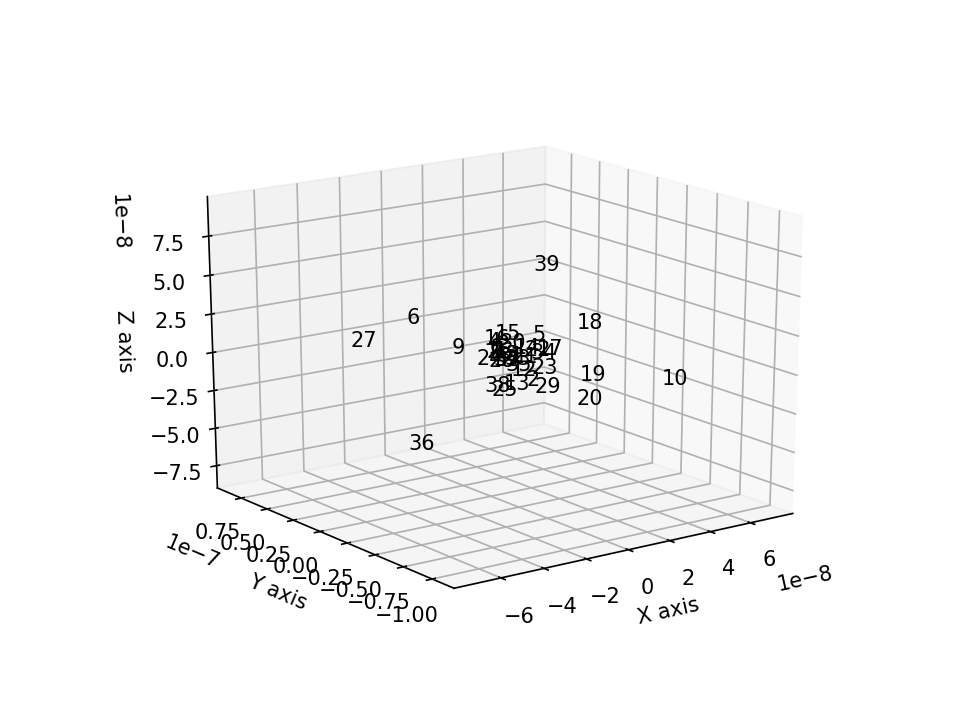

0  :  1.69853731222e-09 4.32739129224e-09 2.13335097214e-09
1  :  -3.63162521439e-09 -8.90488300289e-09 5.20632734409e-09
2  :  -1.38231086469e-09 -3.41529633623e-08 -7.80388154012e-09
3  :  1.9686880257e-11 -1.25642037557e-08 2.64353046582e-09
4  :  2.13682663483e-09 6.27877612529e-09 5.5080725311e-09
5  :  3.30831542062e-08 2.27006342347e-08 -1.58223567316e-09
6  :  5.15072429152e-10 7.72710713193e-08 4.11138501022e-09
7  :  2.13406352939e-10 1.2337097976e-09 1.81973788999e-09
8  :  -1.73676002713e-10 1.00616010062e-09 -5.74143339545e-10
9  :  -3.07612075532e-09 2.97967850899e-08 -2.76370287932e-09
10  :  1.54459347051e-07 1.15360227385e-07 -8.57382209561e-08
11  :  -7.54552456397e-08 -1.71011765981e-09 -6.66973169097e-07
12  :  -9.85781468898e-09 -3.52428969563e-08 9.8395275927e-10
13  :  5.0253119883e-09 -2.58381603982e-09 -2.05072910987e-08
14  :  3.5204152482e-09 -1.34458736056e-08 6.55379736259e-09
15  :  -7.23769092981e-09 -1.66152115422e-08 1.85466795747e-08
16  :  4.171632136

In [14]:
"""
Plot the mean centroids of each class
"""
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = centroids[:,0]
ys = centroids[:,1]
zs = centroids[:,2]


for i, (x, y, z) in enumerate(zip(xs, ys, zs)):
#     label = '(%f, %f, %f) : %d' % (x, y, z, i)
    text = i
    print(i, " : ", x,y,z)
    ax.text(x, y, z, text)

# Tweaking display region and labels
ax.set_xlim(-3e-8, 3e-8)
ax.set_ylim(-5e-8, 3e-8)
ax.set_zlim(-3e-8, 4e-8)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [60]:
# import random
# centroids_temp = [centroids[10], centroids[27]]
# def eval():
#     cls = 27
#     idx = np.where(label==cls)
#     #print(SHAPE_NAMES[cls])
#     idx = idx[0]
#     score = 0.
#     for i in range(len(idx)):
#         img = data[idx[i]]
        
#         center = np.mean(img,axis=0)
        
#         d = np.sqrt(((centroids_temp-center)**2).sum(axis=1))  # compute distances
#         ndx = d.argsort()
        
#         if(ndx[0]==(cls==27)):
#             score += 1
#     print(score/len(idx))

# eval()


0.9519230769230769
